In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("creditcardfraud_normalised.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.564933,0.553154,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.565220,0.537005,0.664877,0.468492,0.592823,0.411176,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [4]:
from collections import Counter
#
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
  per = v/len(target)*100
  print("Class=%d, C,,nt=%d, Percentage=%.3f%%" % (k,v, per))

Class=0, C,,nt=284315, Percentage=99.827%
Class=1, C,,nt=492, Percentage=0.173%


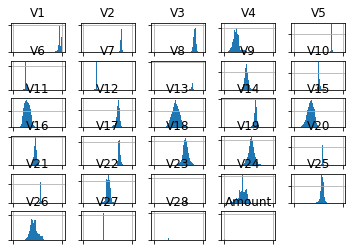

In [5]:

from matplotlib import pyplot
# define the dataset location
# load the csv file as a data frame
# drop the target variable
df_features = df.drop("class", axis=1)
# create a histogram plot of each numeric variable
ax = df_features.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in ax.flatten():
 axis.set_xticklabels([])
 axis.set_yticklabels([])
# show the plot
pyplot.show()

In [6]:
# Assign X and y values
y = df["class"]
X = df_features
        
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train.shape, X_test.shape

((213605, 29), (71202, 29))

In [8]:
# Train a Logistic Regression model print the model score
# Step 1: Instantiate model
model = LogisticRegression()
# Step 2: # Fit the model to the tarinig data
model.fit(X_train, y_train)
# Evaluate the model
print("Train R2 Score: ", model.score(X_train, y_train))
print("Test R2 Score: ", model.score(X_test, y_test))




Train R2 Score:  0.999059010790946
Test R2 Score:  0.9990590151962023


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
#Assess other metrics for the model
y_true = y_test
y_pred = model.predict(X_test)


print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.82      0.52      0.64       113

    accuracy                           1.00     71202
   macro avg       0.91      0.76      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [11]:
# Fit a Random Forests classifier to the data
from sklearn.ensemble import RandomForestClassifier

# Step 1: Instantiate model
clf = RandomForestClassifier(random_state=1, n_estimators=500)

In [13]:
# Fit a Random Forests classifier to the data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [14]:
print(f"Training Score: {clf.score(X_train, y_train)}")
print(f"Testing Score: {clf.score(X_test, y_test)}")

Training Score: 1.0
Testing Score: 0.9995786635206876


In [15]:
#Assess other metrics for the model
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.93      0.80      0.86       113

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [17]:
# Save the feature importances from the Random Forests classifier model to a variable named feature_importances
feature_importance = clf.feature_importances_
print(feature_importance)

[0.01497329 0.01296178 0.01680538 0.02674904 0.01202921 0.01347582
 0.02858586 0.0118125  0.0337078  0.07610422 0.08313057 0.13801841
 0.01028483 0.12263148 0.01249238 0.06603224 0.1654648  0.02422289
 0.01235093 0.01271128 0.01688784 0.01068915 0.00705603 0.00914263
 0.00928008 0.01887234 0.01202776 0.00994557 0.01155389]


[0.01497329 0.01296178 0.01680538 0.02674904 0.01202921 0.01347582
 0.02858586 0.0118125  0.0337078  0.07610422 0.08313057 0.13801841
 0.01028483 0.12263148 0.01249238 0.06603224 0.1654648  0.02422289
 0.01235093 0.01271128 0.01688784 0.01068915 0.00705603 0.00914263
 0.00928008 0.01887234 0.01202776 0.00994557 0.01155389]


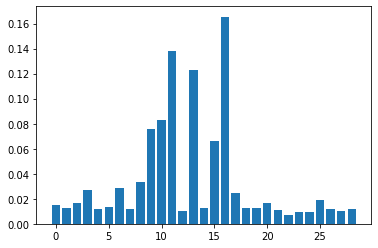

In [18]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [19]:
# Import SelectFromModel, create a selection model, and fit it to the training data
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [20]:
# Use the selection model to create a dataset with only the selected features
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [21]:
# Create a RFC model, and fit it to the original dataset
new_clf = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {new_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {new_clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9994803516755147


In [22]:
predictions = new_clf.predict(X_selected_test_scaled)

In [23]:
# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.90      0.75      0.82       111

    accuracy                           1.00     71202
   macro avg       0.95      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202

